In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

About Data

Bright Motor Company want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.



Data Description:


Age: The age of the individual in years.
Gender: The gender of the individual, categorized as male or female.
Profession: The occupation or profession of the individual.
Marital_status: The marital status of the individual, such as married &, single.
Education: The educational qualification of the individual Graduate and Post Graduate.
No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No".
House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No".
Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No".
Salary: The individual's salary or income.
Partner_salary: The salary or income of the individual's partner, if applicable.
Total_salary: The total combined salary of the individual and their partner (if applicable).
Price: The price of a product or service.
Make: The type of automobile

In [39]:
import pandas as pd

df = pd.read_csv('bright_automotive_company.csv')
df.head()  



,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [41]:
df.describe()


,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


In [42]:
df.shape

(1581, 14)

In [43]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [44]:
df.isnull()


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1577,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1578,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1579,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [45]:
df.isnull().sum()

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [46]:
df.duplicated().sum()


0

In [47]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1576    False
1577    False
1578    False
1579    False
1580    False
Length: 1581, dtype: bool

In [48]:
df.dtypes


Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents     object
Personal_loan        object
House_loan           object
Partner_working      object
Salary              float64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object

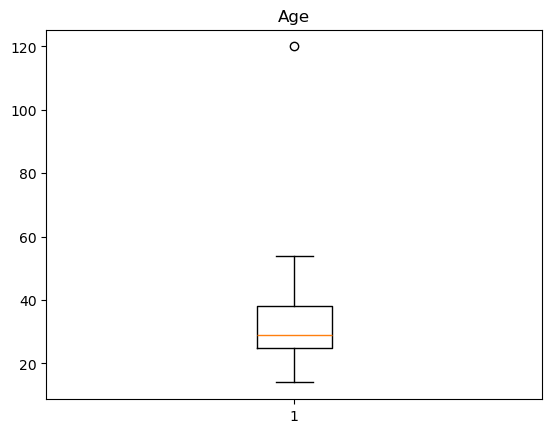

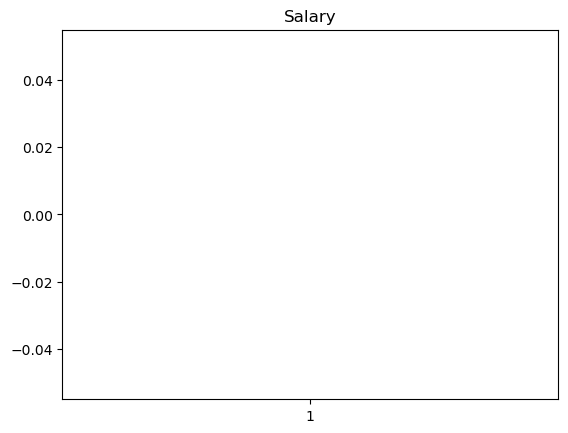

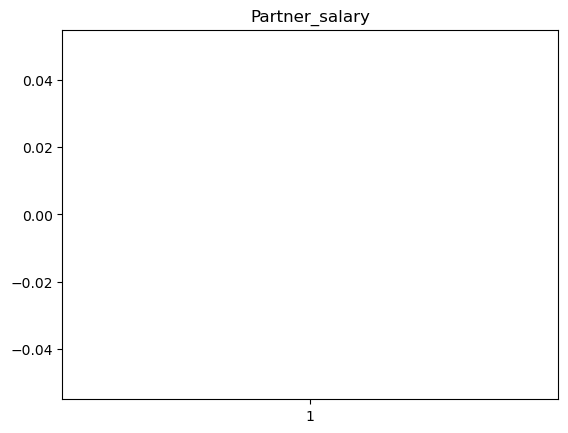

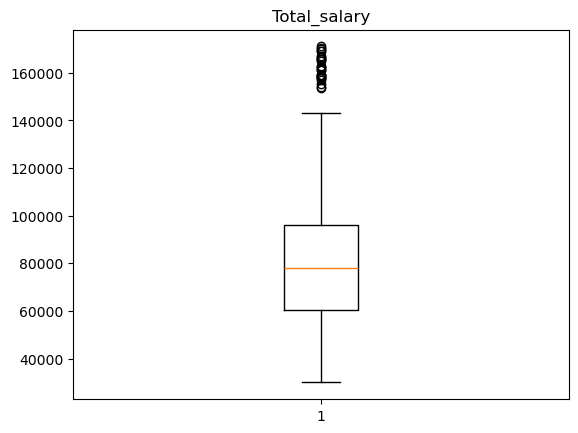

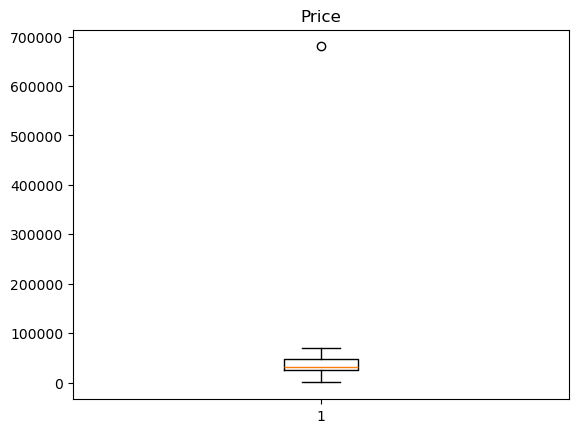

In [49]:
for col in ['Age','Salary','Partner_salary','Total_salary','Price']:
    plt.boxplot(df[col])
    plt.title(f"{col}")
    plt.show()


In [50]:
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [51]:
print("Total missing values in each column:")
df.isnull().sum()

Total missing values in each column:


Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [52]:
print("Total duplicate entries: ",len(df[df.duplicated()]))

Total duplicate entries:  0


In [53]:
corrections = {'Femal':'Female','Femle':'Female'}
df['Gender'] = df ['Gender'].replace(corrections)
df['Gender'].value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [54]:
print(f"Mean: {round(df['Age'].mean(),2)}\nMedian: {df['Age'].median()}\nMode: {df['Age'].mode()[0]}")

Mean: 31.95
Median: 29.0
Mode: 28


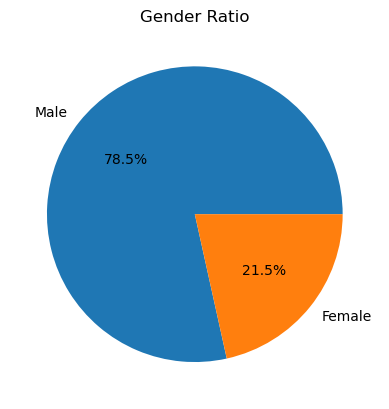

In [55]:
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.show()

<Axes: >

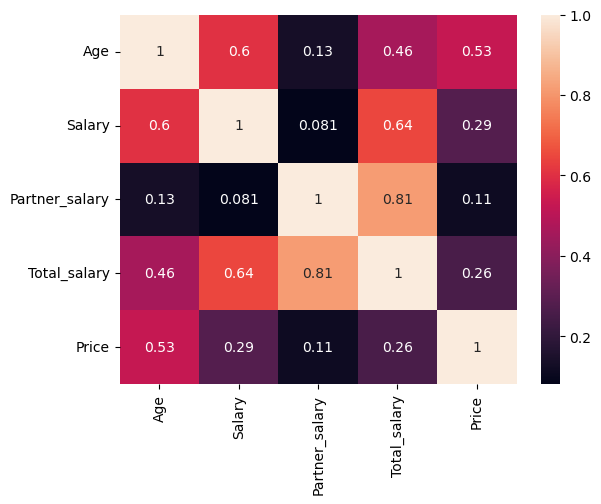

In [56]:
numerical_data = df.select_dtypes(include=['int','float'])
sns.heatmap(numerical_data.corr(),annot = True)

<Axes: >

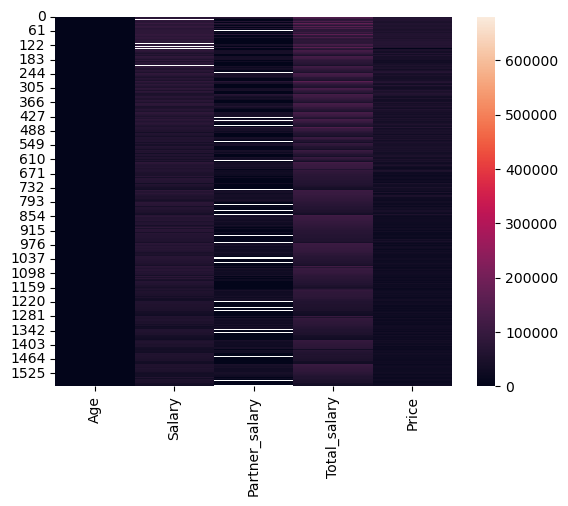

In [57]:
numerical_data = df.select_dtypes(include=['int','float'])
sns.heatmap(numerical_data)

What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

In [59]:
avg_salary = df.groupby(by='Education')['Salary'].mean()
avg_salary

Education
Graduate         48440.709459
Post Graduate    67456.250000
Name: Salary, dtype: float64

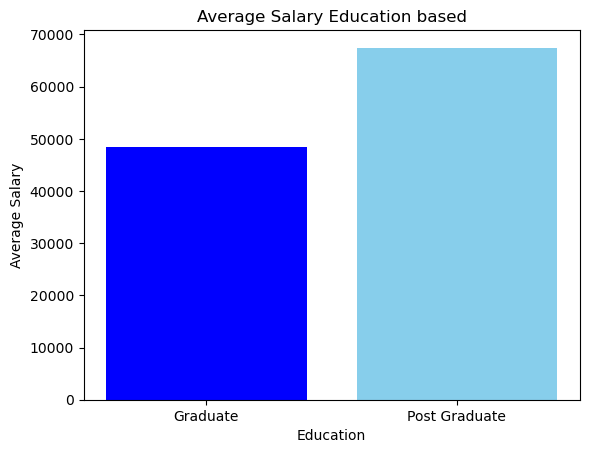

In [60]:
plt.bar(avg_salary.index, avg_salary,color=['blue','skyblue'])
plt.xlabel('Education')
plt.ylabel('Average Salary')
plt.title("Average Salary Education based")
plt.show()

What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [62]:
loan_taker = df.groupby(by='Gender').count()
print("Total Personal Loan taker are: ",loan_taker.sum())

Total Personal Loan taker are:  Age                 1528
Profession          1522
Marital_status      1528
Education           1528
No_of_Dependents    1528
Personal_loan       1528
House_loan          1528
Partner_working     1528
Salary              1515
Partner_salary      1425
Total_salary        1528
Price               1528
Make                1528
dtype: int64


In [63]:
loan_takers = df[df['Personal_loan']=='Yes'].groupby(by='Gender')['Personal_loan'].count()
print("Toal Personal Loan takers are: ",loan_takers.sum())
print("Percentage of Male more than female is:",round(((loan_takers[1]-loan_takers[0])/loan_takers[0])*100,2),'%')

Toal Personal Loan takers are:  768
Percentage of Male more than female is: 315.44 %


C:\Users\rajpu\AppData\Local\Temp\ipykernel_11584\269958080.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percentage of Male more than female is:",round(((loan_takers[1]-loan_takers[0])/loan_takers[0])*100,2),'%')


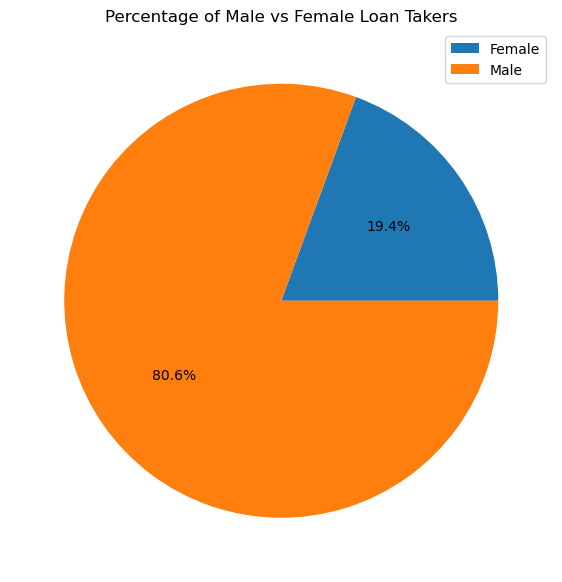

In [64]:
plt.figure(figsize=(7,9))
plt.pie(loan_takers,autopct='%1.1f%%')
plt.legend(labels=loan_takers.index)
plt.title("Percentage of Male vs Female Loan Takers")
plt.show()

What is the average number of dependents for married individuals vs single individuals?

In [66]:
avg_dependent = df.groupby(by='Marital_status')['No_of_Dependents']
avg_dependent

In [67]:
avg_salary_data = df.groupby('Partner_working')['Salary'].mean()
avg_salary_data

Partner_working
No     60271.428571
Yes    60281.336406
Name: Salary, dtype: float64

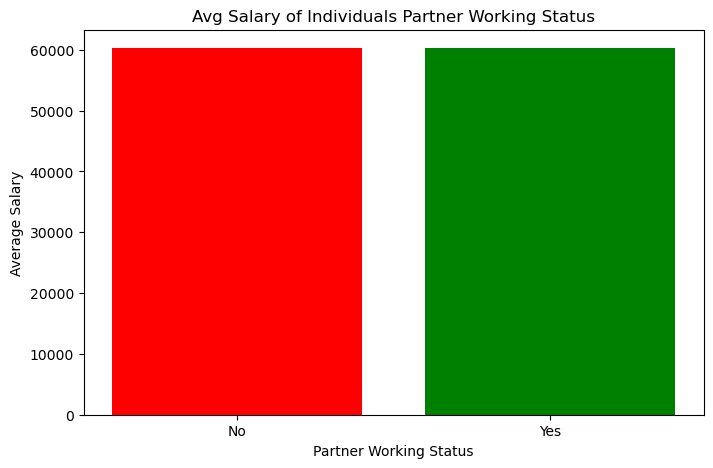

In [68]:
plt.figure(figsize=(8, 5))
plt.bar(avg_salary_data.index,avg_salary_data,color=['red','green'])
plt.xlabel('Partner Working Status')
plt.ylabel('Average Salary')
plt.title('Avg Salary of Individuals Partner Working Status')
plt.show()

In [69]:
house_loan = df[df['House_loan']=='Yes'].groupby(by='Profession')['House_loan'].count()
house_loan

Profession
Business    229
Salaried    298
Name: House_loan, dtype: int64

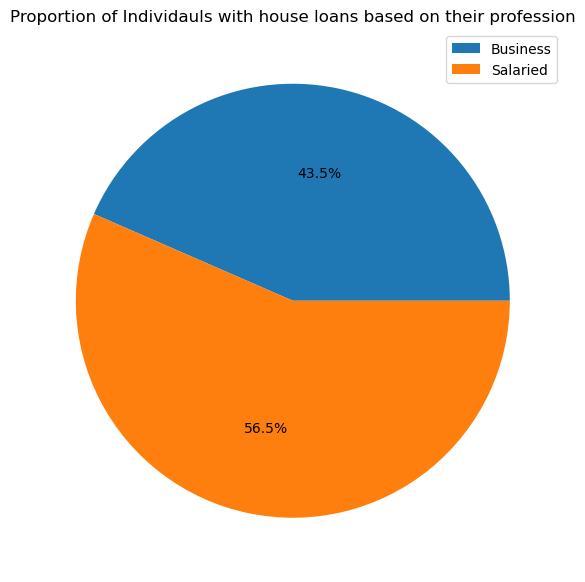

In [70]:
plt.figure(figsize=(7,9))
plt.pie(house_loan,autopct='%1.1f%%')
plt.legend(labels=house_loan.index)
plt.title("Proportion of Individauls with house loans based on their profession")
plt.show()

C:\Users\rajpu\AppData\Local\Temp\ipykernel_11584\3045704495.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(personal_loan_salaries, labels=['No Personal Loan', 'Has Personal Loan'])


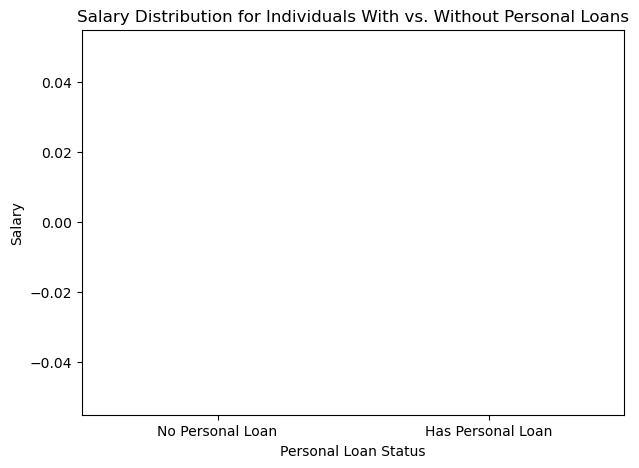

In [71]:
personal_loan_salaries = [group['Salary'].values for _, group in df.groupby('Personal_loan')]
plt.figure(figsize=(7, 5))
plt.boxplot(personal_loan_salaries, labels=['No Personal Loan', 'Has Personal Loan'])
plt.title('Salary Distribution for Individuals With vs. Without Personal Loans')
plt.xlabel('Personal Loan Status')
plt.ylabel('Salary')
plt.show()

C:\Users\rajpu\AppData\Local\Temp\ipykernel_11584\2017727246.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(personal_loan_salaries, labels=['No Personal Loan', 'Has Personal Loan'])


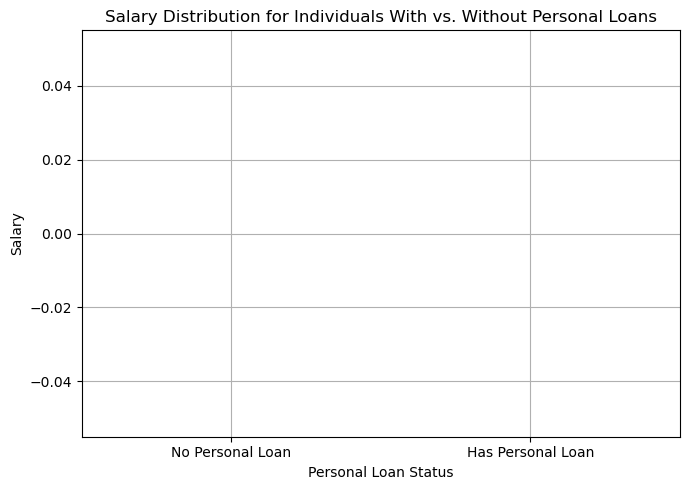

In [77]:
personal_loan_salaries = [
    group['Salary'].values for _, group in df.groupby('Personal_loan', sort=False)
]

# Plot
plt.figure(figsize=(7, 5))
plt.boxplot(personal_loan_salaries, labels=['No Personal Loan', 'Has Personal Loan'])
plt.title('Salary Distribution for Individuals With vs. Without Personal Loans')
plt.xlabel('Personal Loan Status')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()


How does having a personal loan affect the total combined salary of the individual and their partner?

In [73]:
salary_by_loan = df.groupby("Personal_loan")["Total_salary"].mean()
print(salary_by_loan)

Personal_loan
No     81077.566540
Yes    78179.924242
Name: Total_salary, dtype: float64


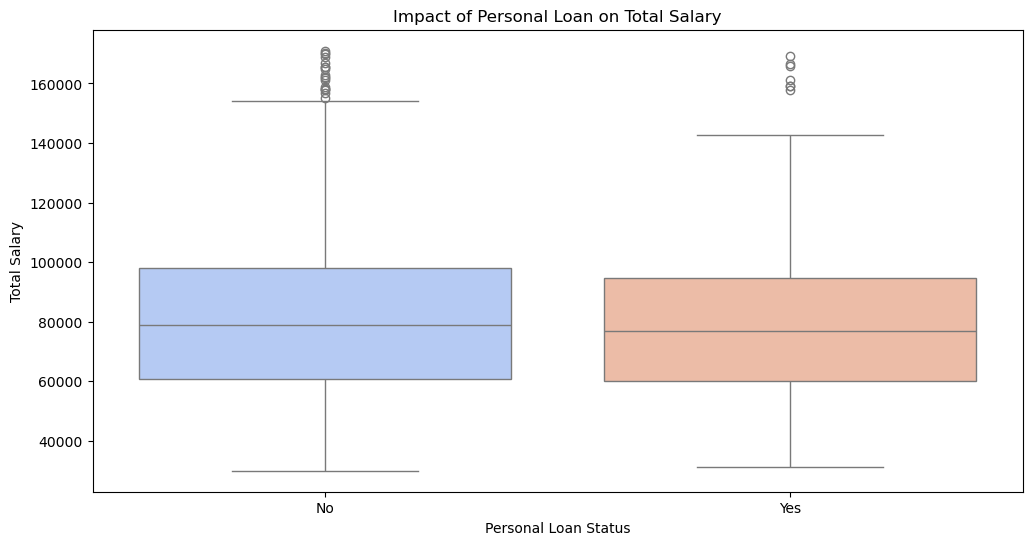

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Personal_loan", y="Total_salary", data=df, hue='Personal_loan',palette="coolwarm")
plt.xlabel("Personal Loan Status")
plt.ylabel("Total Salary")
plt.title("Impact of Personal Loan on Total Salary")
plt.show()

What is the average partner's salary for individuals with and without house loans?

In [81]:
houseLoan_partner_salary = df.groupby('House_loan')['Partner_salary'].mean()
round(houseLoan_partner_salary,2)

House_loan
No     20678.24
Yes    19332.06
Name: Partner_salary, dtype: float64

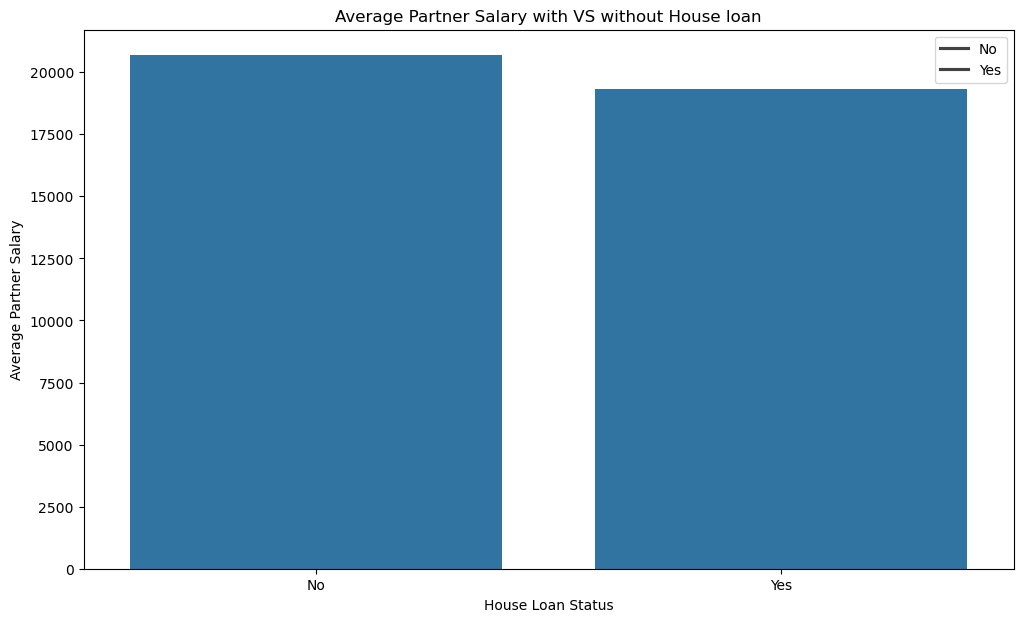

In [83]:
plt.figure(figsize=(12,7))
sns.barplot(houseLoan_partner_salary,)
plt.legend(labels=houseLoan_partner_salary.index)
plt.xlabel('House Loan Status')
plt.ylabel('Average Partner Salary')
plt.title('Average Partner Salary with VS without House loan')
plt.show()

Create a histogram showing the distribution of total combined salaries. Identify and discuss any skewness or outliers in the data.

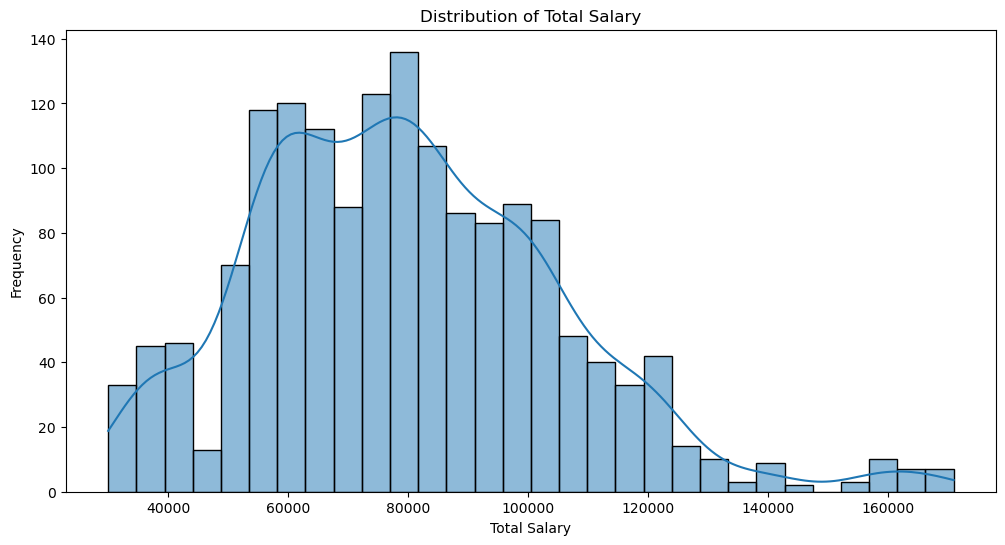

In [88]:
plt.figure(figsize=(12,6))
sns.histplot(x='Total_salary',bins=30,data=df,kde=True)
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Total Salary')
plt.show()


Model Building

Build a regression model to predict an individual's salary based on age, education, and number of dependents. Discuss the model's accuracy and significance.

In [94]:
X = df[['Age','Education','No_of_Dependents']]
y = df['Salary']


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CONCLUSION

The analysis of the Bright Motor Company dataset provided some insights and predictive modeling:

Salaries tend to increase with age and education, but other factors may influence earnings.
It show, that as the individuals total salary increases individuals goes toward luxuriers automobile which make the Service Price to be increased.
Salaried individuals take more loans than business owners due to stable income and easier loan approvals.
Higher education and age correlated with increased salaries, but dependents showed minimal effect.

Predictive Modeling using Ridge Regression:

A Ridge Regression model was built to predict salary based on Age, Education, and Number of Dependents.
Model evaluation showed an RMSE of ₹7,166 and a Normalized RMSE of 0.121, indicating a reasonably good fit for a basic regression approach.
The low error percentage (12.1%) suggests the model captures salary trends fairly well.
